# Bab 1: Introduction

Nama: Allen

Batch: FTDS_BSD_003

Dataset: `humanitarian-aid`

Problem Statement:


---

# Bab 2: Import Libraries

In [1]:
# Import Library
import numpy as np
import pandas as pd
import pickle
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.manifold import TSNE
import plotly.graph_objects as go

---

# Bab 3: Data Loading

In [2]:
#Untuk mengeload data set
df_ori=pd.read_csv('humanitarian-aid.csv')


#Membuat Duplicate df_ori
df=df_ori.copy()

#Tampilkan 10 data ter atas
df.head(10)

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


Sebelum eksplorasi data ada baiknya kita mengerti kolom kolom data kita ada apasaja dan apa maksud dari data set yang diberikan dengan mendefinisikan kolom kolom yang kita punya:
 - `country`: Nama negara
 - `child_mortality`: Kematian anak dibawah usia 5 tahun per 1000 kelahiran hidup
 - `eksports`: Ekspor barang dan jasa. Diberikan sebagai persentase dari Total PDB
 - `health`: Total belanja kesehatan sebagai persentase dari Total PDB
 - `imports`: Impor barang dan jasa. Diberikan sebagai persentase dari Total PDB
 - `income`: Pendapatan bersih per orang
 - `inflation` :Pengukuran tingkat pertumbuhan tahunan dari Total PDB
 - `life_expectancy`: Jumlah rata-rata tahun hidup seorang anak yang baru lahir jika pola kematian saat ini tetap sama
 - `total_fertility`: Jumlah anak yang akan dilahirkan oleh setiap wanita jika tingkat kesuburan usia saat ini tetap sama
 - `gdpp` : PDB per kapita. Dihitung sebagai Total PDB dibagi dengan total populasi.

In [3]:
# Untuk melihat rangkuman data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          167 non-null    object 
 1   child_mortality  167 non-null    float64
 2   exports          167 non-null    float64
 3   health           167 non-null    float64
 4   imports          167 non-null    float64
 5   income           167 non-null    int64  
 6   inflation        167 non-null    float64
 7   life_expectancy  167 non-null    float64
 8   total_fertility  167 non-null    float64
 9   gdpp             167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
# Melihat baris dan kolom pada data
df.shape

(167, 10)

In [5]:
# Melihat kolom pada data
df.columns

Index(['country', 'child_mortality', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expectancy', 'total_fertility', 'gdpp'],
      dtype='object')

In [6]:
# Melihat missing value atau nilai NaN
df.isnull().sum()

country            0
child_mortality    0
exports            0
health             0
imports            0
income             0
inflation          0
life_expectancy    0
total_fertility    0
gdpp               0
dtype: int64

In [7]:
# Melihat data terduplikasi
df.duplicated().sum()

0

In [8]:
# Melihat nilai unique setiap kolom
df.nunique()

country            167
child_mortality    139
exports            147
health             147
imports            151
income             156
inflation          156
life_expectancy    127
total_fertility    138
gdpp               157
dtype: int64

In [9]:
# Melihat rangkuman data mean std min median max
df.describe()

,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


---

# Bab 4: Data Exploratory

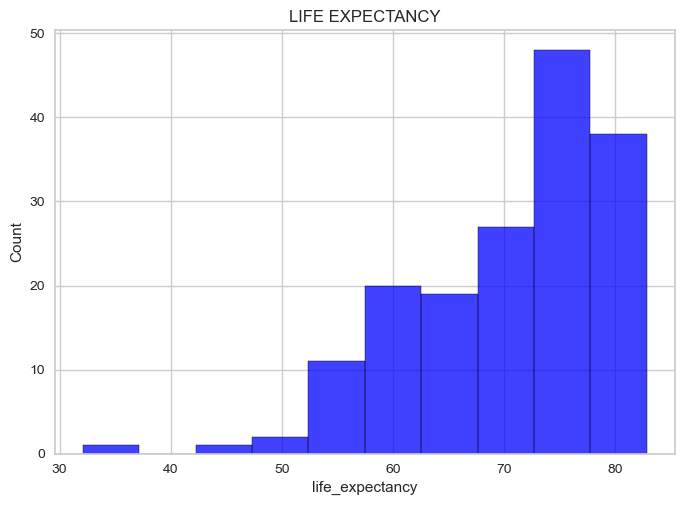

In [10]:
#Visualisasi data distribusi credit limit
sns.histplot(df.life_expectancy, bins=10, color='BLUE')
plt.title("LIFE EXPECTANCY")
plt.show()

Bisa kita lihat informasi di atas ternyata dari negara-negara yang ada pada data sebagian besar negara sudah memiliki nilai life_expectancy yang cukup tinggi untuk detailnya akan kita lakukan clustering untuk melihat ada berapa negara yang sudah memiliki life_expectancy memadai dan tidak memadai

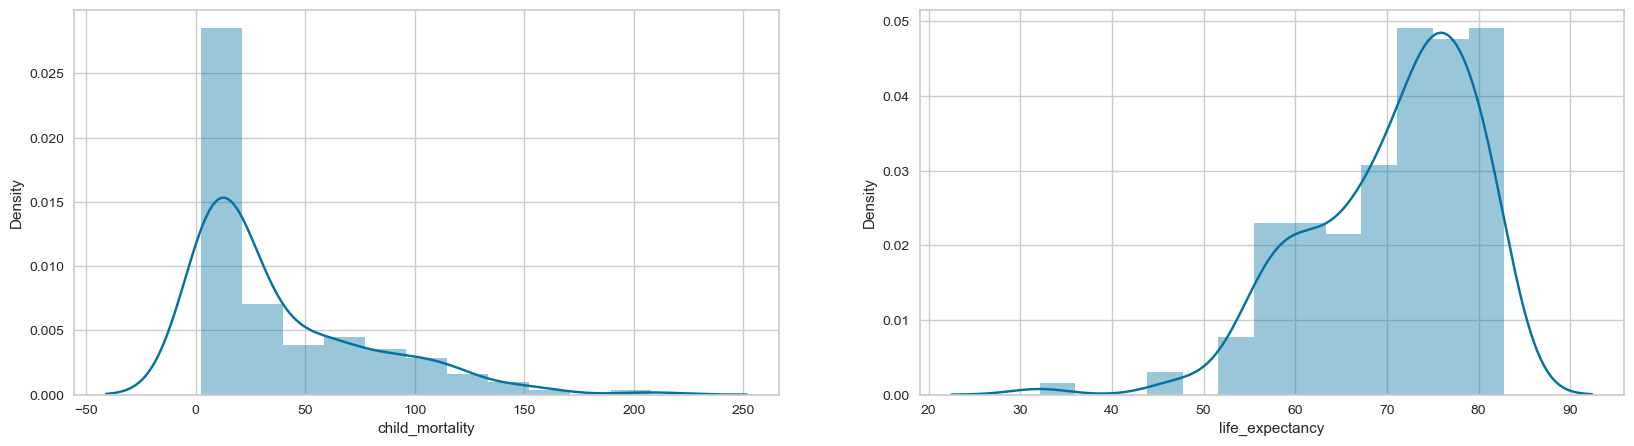

In [11]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df.child_mortality)

plt.subplot(122)
sns.distplot(df.life_expectancy)

plt.show()

Dari informasi di atas kaitanyya dengan life_expectancy yang tinggi dimana memang berkaitan atau memiliki korelasi positif dengan child mortality atau tingkat kematian anak yang rendah

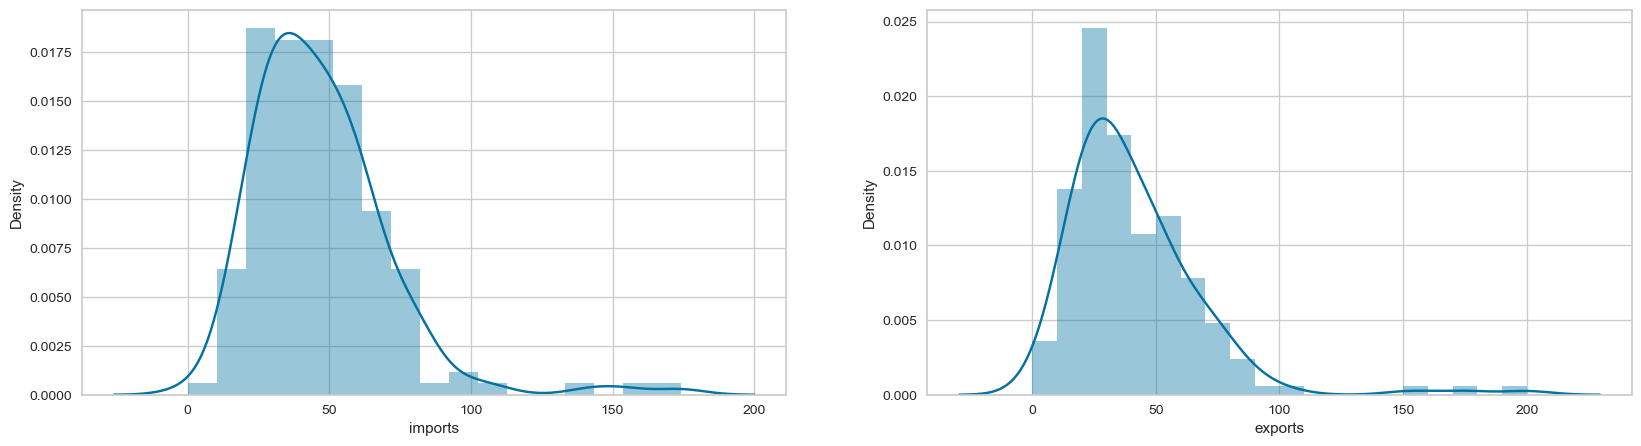

In [12]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df.imports)

plt.subplot(122)
sns.distplot(df.exports)

plt.show()

Dari informasi di atas kita memperoleh data negara-negara yang ada ternyata sebagian besar negara masih banyak yang tingkat exports nya lebih rendah dari tingkat importsnya sehingga dapat mempengaruhi income dan juga gdpp sebuah negara 

---

# Bab 5: Feature Engineering

Sebelum kita melakukan PCA kita harus mengedrop terlebih dahulu kolom kategorikal dikarenakan kolom kategorikal tidak bisa dilakukan process PCA maka kita akan drop kolom `country`

In [13]:
# untuk menghapus kolom country
df= df.drop(['country'], axis =1)

In [14]:
# Tersisa 9 kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   child_mortality  167 non-null    float64
 1   exports          167 non-null    float64
 2   health           167 non-null    float64
 3   imports          167 non-null    float64
 4   income           167 non-null    int64  
 5   inflation        167 non-null    float64
 6   life_expectancy  167 non-null    float64
 7   total_fertility  167 non-null    float64
 8   gdpp             167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


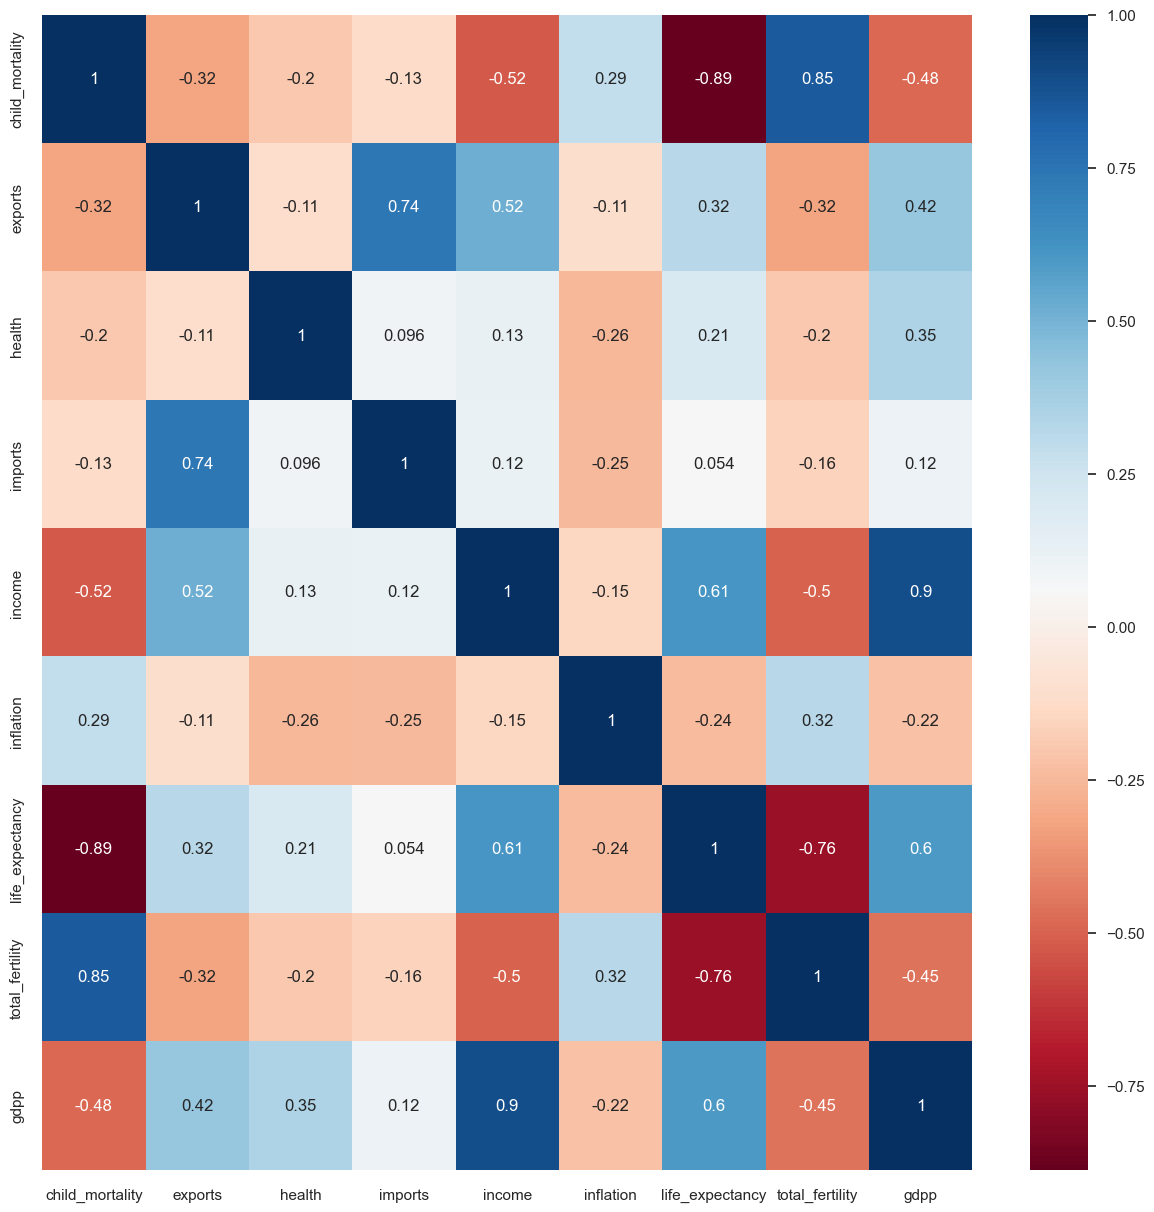

['life_expectancy', 'total_fertility', 'gdpp']

In [15]:
# Visualisasi korelasi antar kolom
def high_correlated_cols(dataframe, plot=False, corr_th=0.80):
    # Select only the numeric columns from the DataFrame
    numeric_dataframe = dataframe.select_dtypes(include=['number'])
    
    corr = numeric_dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu",annot=True)
        plt.show()
    
    return drop_list

# Pemanggilan function:
high_correlated_cols(df, plot=True)

Tahapan selanjutnya setelah melihat korelasi antar kolom kita tidak akan mengedrop kolom apapun karena feature yang kita miliki sangatlah sedikit namun kita akan melakukan reduction menggunakan PCA, sebelum itu semua mari kita melihat dan handling outlier jika ada

## Checking dan Handling Outlier

In [16]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

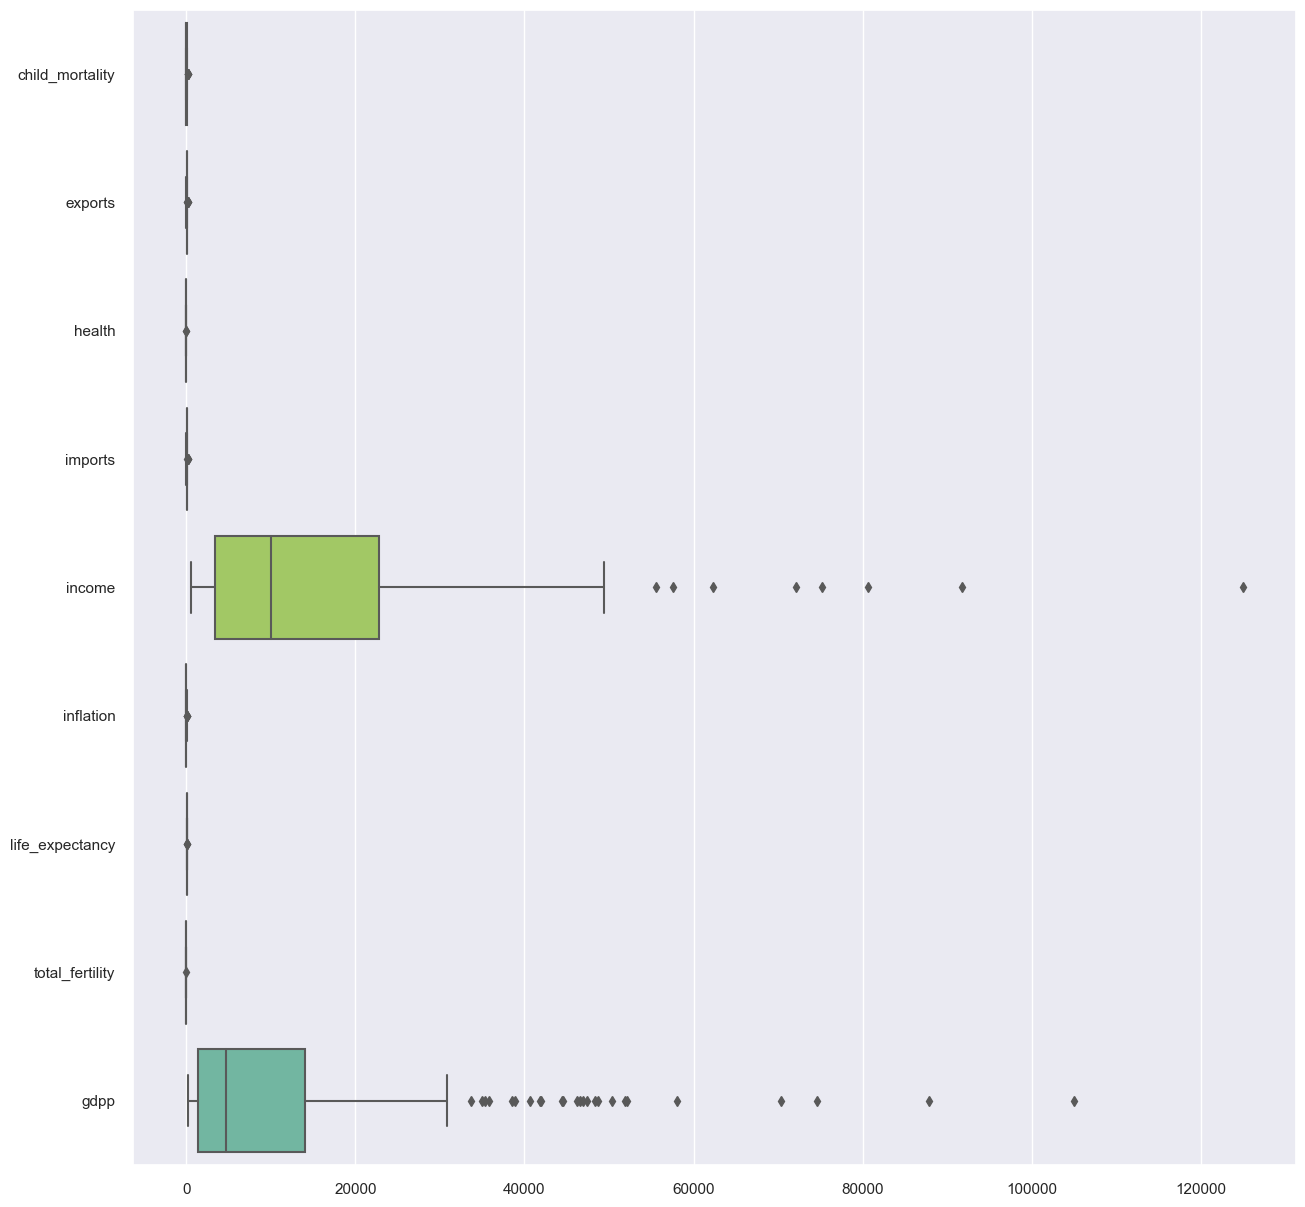

In [17]:
# visualizing outliers
ax = sns.boxplot(data=df, orient="h", palette="Set2")

In [18]:
def handling_outliers(df, columns):
    for column in columns:
        # calculate Q1 and Q3 of the column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # define the fences
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR

        # cap the outliers to the nearest actual data point
        df[column] = np.where(df[column] > upper_fence, upper_fence, 
                              np.where(df[column] < lower_fence, lower_fence, df[column]))
    
    return df
columns = ['child_mortality', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expectancy', 'total_fertility', 'gdpp']
df_clear= handling_outliers(df,columns)

In [19]:
df_clear.head()

,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


In [20]:
df_clear.shape

(167, 9)

In [21]:
df.shape

(167, 9)

In [20]:
df_clear.to_csv('inference.csv')

Tahapan selanjutnya adalah model definition

---

# Bab 6: Model Definition

In [21]:
# Feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clear)

In [22]:
# Reduction using PCA
pca = PCA()
numb_comp= pca.fit_transform(df_clear)

Text(0, 0.5, 'Eigenvalues')

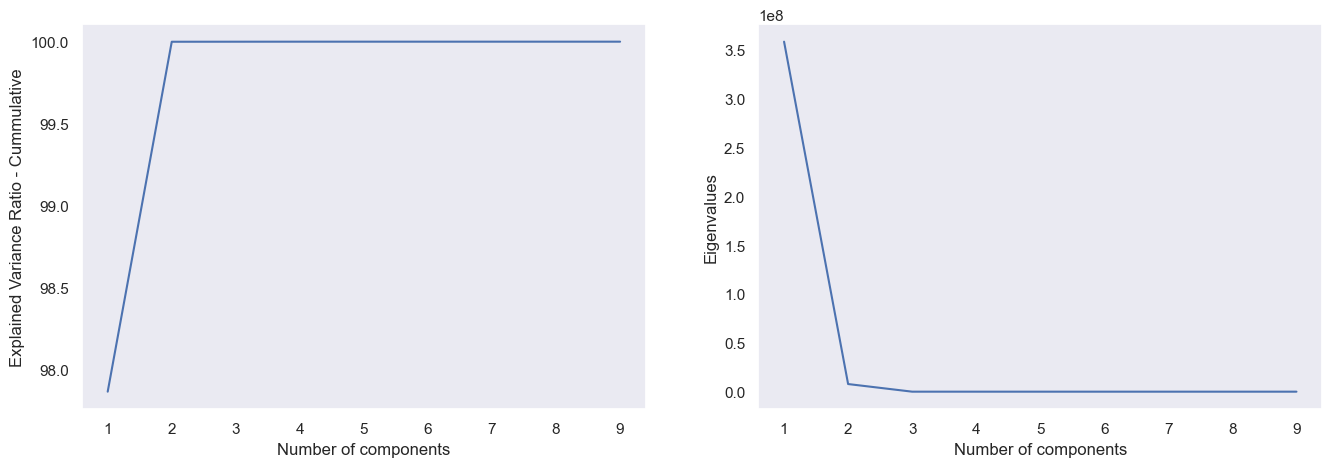

In [24]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 10), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 10), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [32]:
# Check harus memakai berapa kolom untuk mengkeep 100% informasi
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 1) + 1
num_features

9

Oke dari data di atas kita akan mengkeep 100% informasi dikarenakan feature kita yang memang sedikit apabila kita mengkeep 90%-95% informasi maka akan hanya ada 2 feature yang akan dugunakan pada tahap PCA nanti dan akan membuat analisisnya kurang mendetail sehingga kita akan keep 100% informasi untuk menentukan optimal kluster menggunakan metode elbow dan juga siluet score, mari kita training model yang sudah kita definisikan di atas

---

# Bab 7: Model Training

In [34]:
# Melatih model dengan 100% informasi
pca = PCA(n_components=9)
pca.fit(df_scaled)

df_pca = pca.fit_transform(df_scaled)

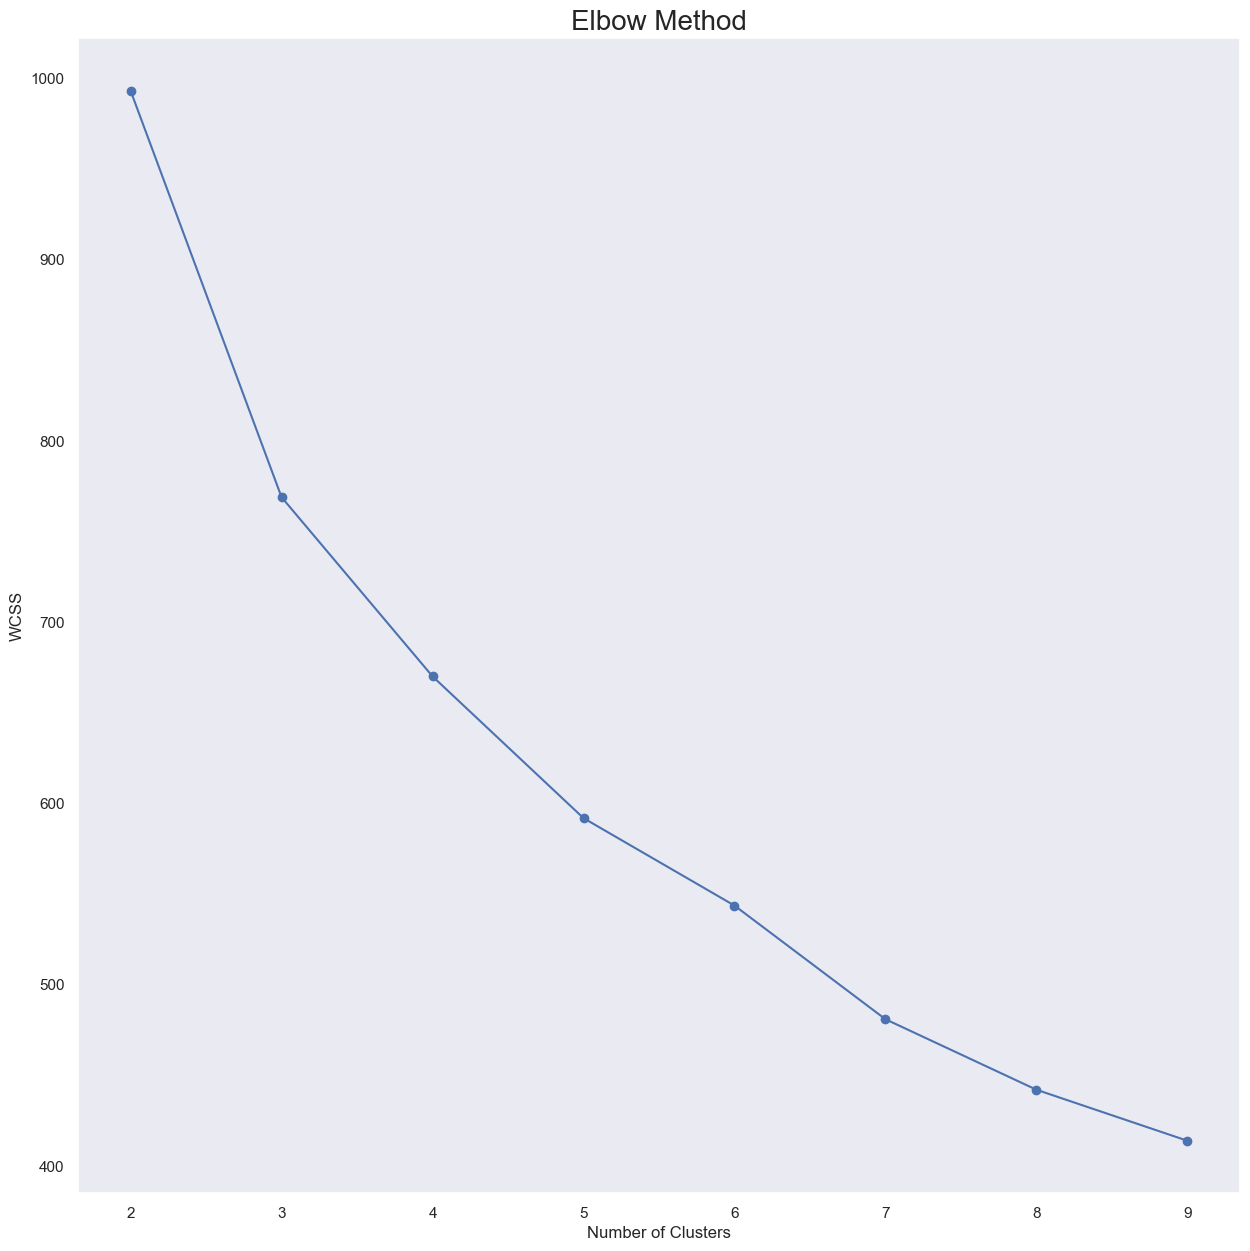

In [37]:
# Metode Elbow untuk mencari cluster teroptimal

wcss = []
random_state = 10
max_cluster = 9
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Dari informasi di atas dikarenakan metodel elbow masih sangat ambiguitas dengan grafiknya yang landai mari kita cek dengan metode lain seperti Silhouette Score and Plot Silhouette Plot

In [43]:
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        
        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters , init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.28983951535744495
For n_clusters = 3 The average silhouette_score is : 0.27969197454490136
For n_clusters = 4 The average silhouette_score is : 0.24037535096983845
For n_clusters = 5 The average silhouette_score is : 0.24713811349433154
For n_clusters = 6 The average silhouette_score is : 0.2516563658598668
For n_clusters = 7 The average silhouette_score is : 0.25667314795662316
For n_clusters = 8 The average silhouette_score is : 0.26809955987831674


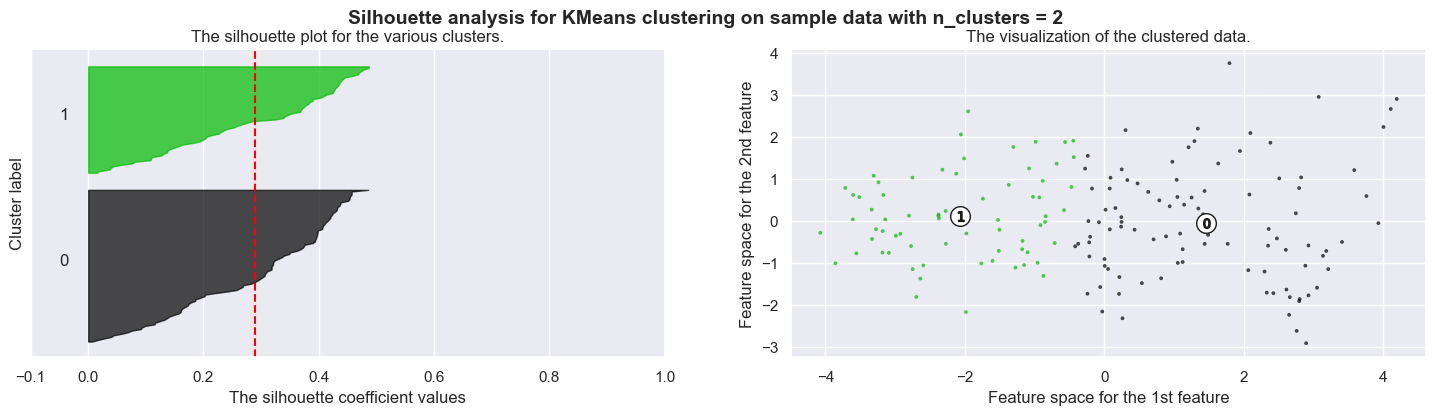

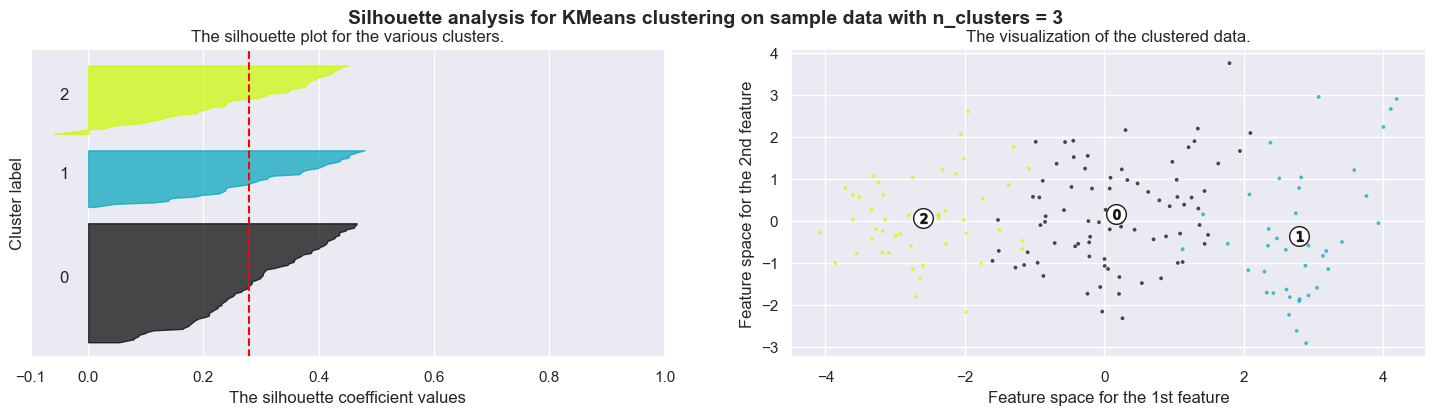

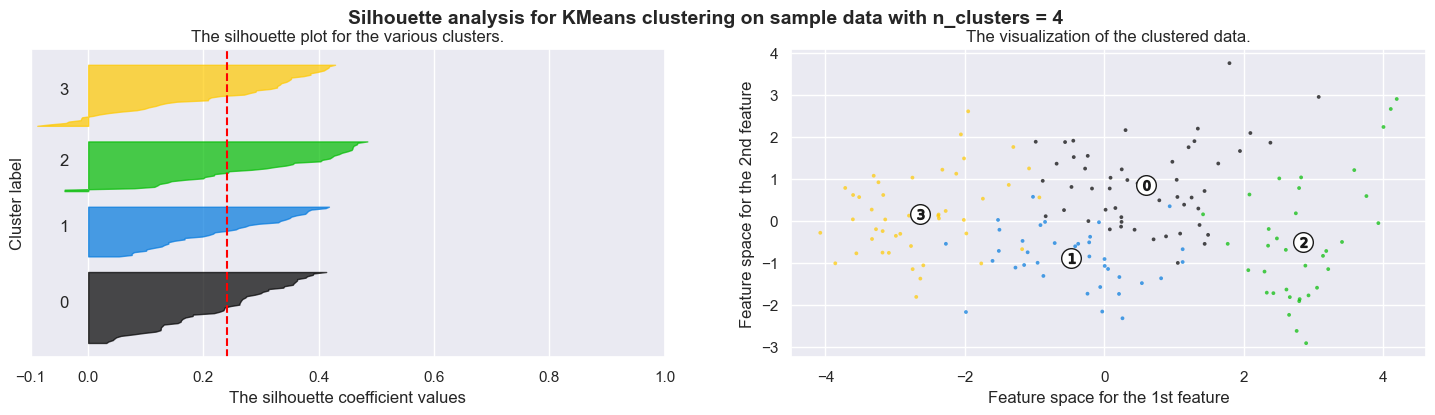

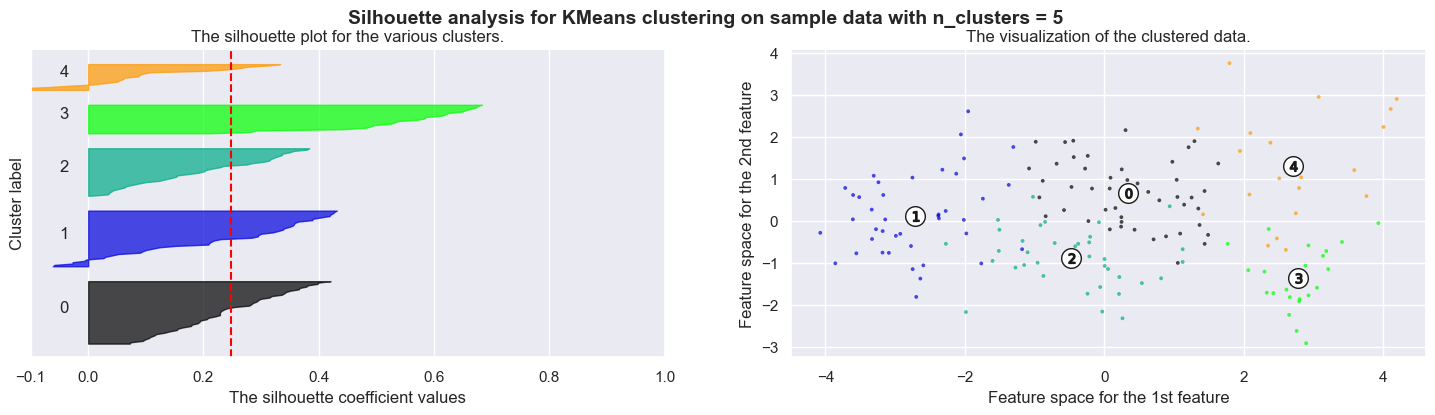

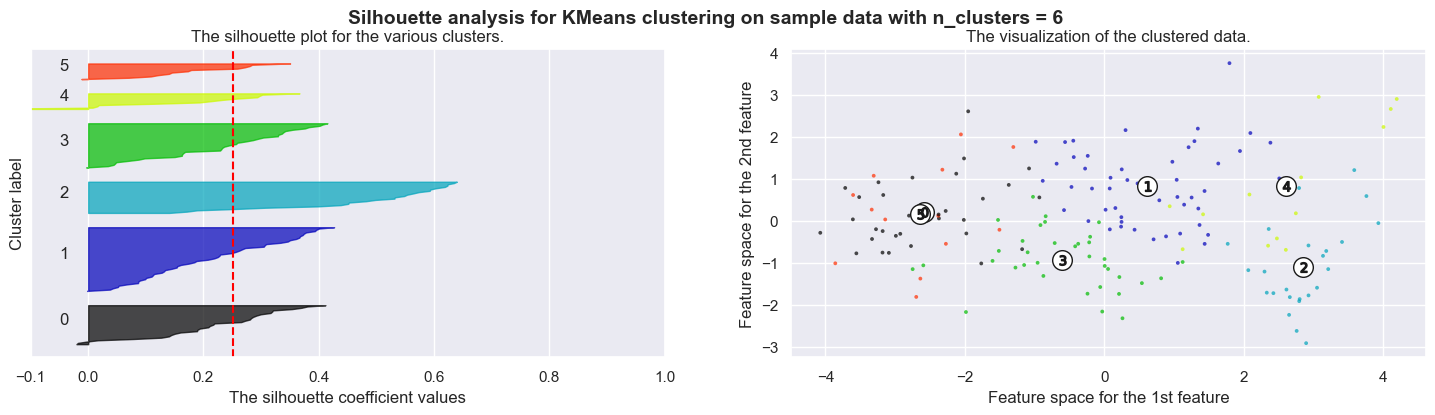

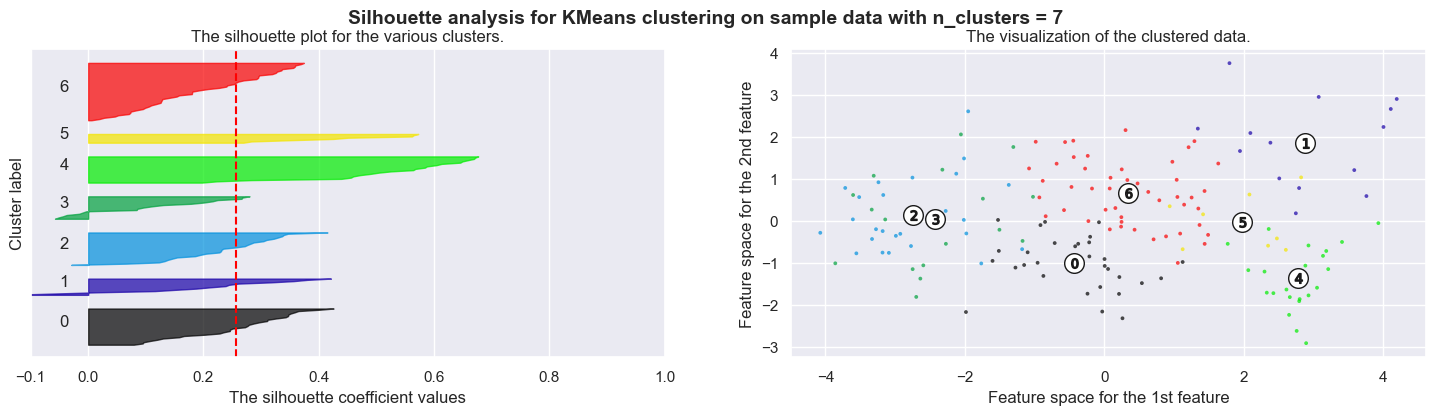

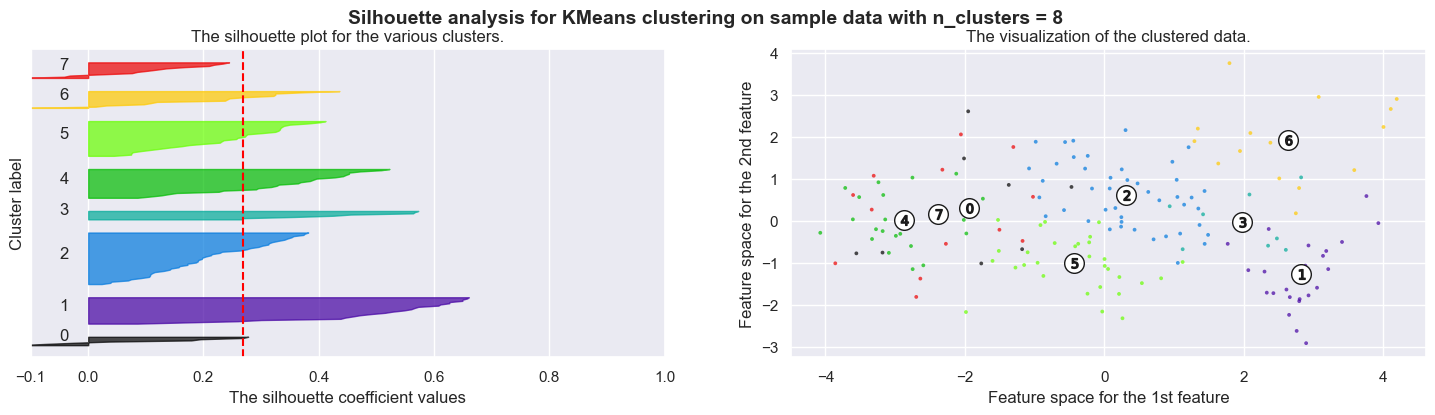

In [44]:
# Display the Silhouette Score and Plot Silhouette Plot
plot_silhouette(range(2, max_cluster), df_pca, random_state)

Terlihat dari data Silhouette score tertingga ada pada cluster `2` dan untuk besarnya data juga sudah sama serta pembagian titik data sudah merata agar lebih yakin mari kita lihat metode Silhouette plot

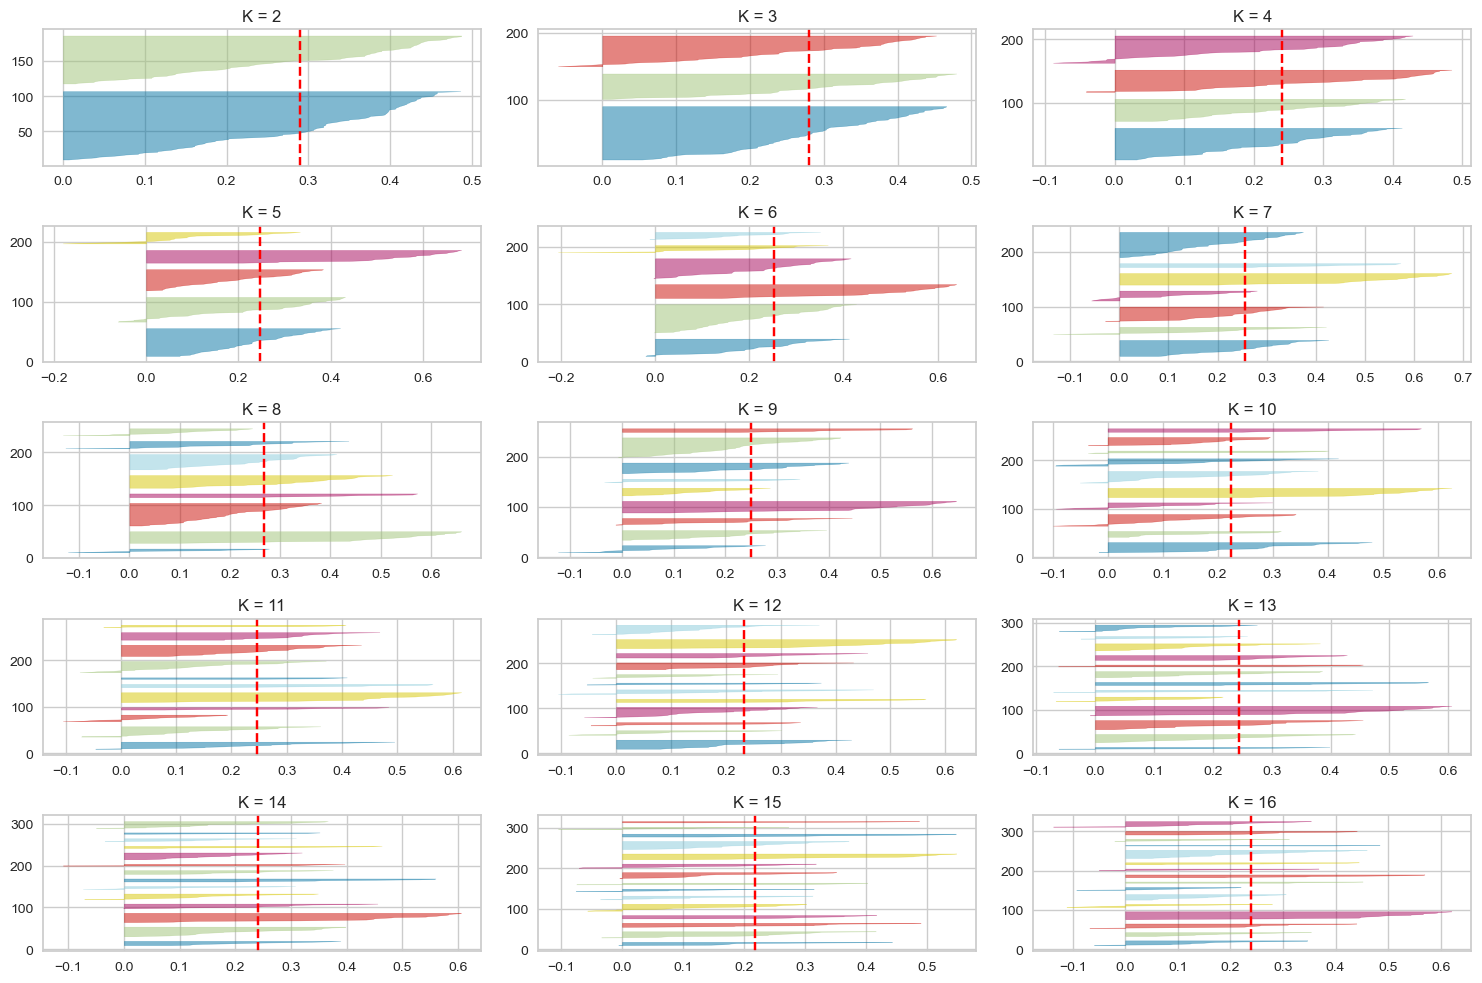

In [46]:
# Display the Silhouette Score and Plot Silhouette Plot
fig, axes = plt.subplots(5, 3, figsize=(15, 10))

# Loop for each plot
for i, ax in enumerate(axes.flatten()):

    # Initialize K-means clustering
    n_clusters = i + 2
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer to data
    visualizer.fit(df_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

kesimpulan dari Silhouette Score and Plot Silhouette Plot menunjukkan cluster yang memiliki score atau nilai tertinggi pada cluster `2` dimana dari segi persebaran datanya sudah cukup balance dan juga visualisasinya terlihat lebih fit. Sebelum masuk tahapan selanjutnya yaitu visualisasikan kembali dalam bentuk 2D pada `Exploratory Data Analyst jilid 2 (EDA 2)` kita akan membuat kolom baru dengan nama `cluster` untuk menguji model yang sudah kita buat dan mengklasifikasikan setiap data termasuk pada cluster mana saja.

In [47]:
# defined model Kmeans
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(df_pca)
pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [48]:
# fit transform model
km.fit(df_pca)

KMeans(n_clusters=2, n_init=10, random_state=10)

In [105]:
# Insert clustering result into original dataset
df_ori['cluster'] = pred
df_ori

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [62]:
# Melihat jumlah nilai unik pada kolom cluster kita
cluster_counts= df_clear['cluster'].value_counts()
print(cluster_counts)

cluster
0    98
1    69
Name: count, dtype: int64


In [55]:
# displaying cluster profiles
cluster_mean = df_clear.groupby('cluster').mean()
cluster_mean

,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
cluster,,,,,,,,,
0,12.171429,46.231378,7.320102,47.596939,24111.020408,5.105214,76.515306,1.938469,16236.020408
1,73.953623,30.044913,6.043333,43.398057,4290.188406,9.848623,62.352899,4.374746,1993.246377


Oke dari kedua informasi di atas kita dapat menyimpulkan bahwa terdapat 2 cluster dari data yaitu:
- Cluster `0` = sebanyak `98` negara
Adalah cluster negara-negara dimana dikatakan negara yang `tidak membutuhkan bantuan` or `no need humanitarian-aid` dimana kita bisa lihat dari kolom `child-mortality` atau tingkat kematian anak yang rendah juga sangat erat kaitannya dengan tingkat `health` atau kesehatan yang tinggi pula tentunya dimana hal ini disupport dengan pendapatan negara yang tinggi bisa kita lihat dari kolom `income`dan `gdpp` yang tinggi serta `inflation` yang rendah dimana negara-negara ini mampu mengendalikan porsi `exports` dan `imports` sehingga pendapatan dan pengeluaran seimbang dan mensupport pendapatan negara, semua aspek yang telah disebutkan di atas memaknai harapan hidup yang tinggi dari suatu negara tersebut dimana kita bisa melihat kolom `life_expectancy` yang tinggi daripada cluster `1`

- Cluster `1` = sebannyak `69` negara
Adalah cluster negara negara dimana yang bisa katakan negara yang membutuhkan `bantuan` or `needing humanitarian-aid` dimana kita bisa lihat dari kolom `child_mortality` atau tingkat kematian anak yang sangat tinggi berkaitan erat dengan tingkat `health` yang rendah tentunya dikarenakan negara tidak mampu memfasilitasi masyarakatnya dengan fasilitas kesehatan yang memadai dengan `inflation` yang tinggi serta `income` dan `gdpp` yang rendah diakibatkan negara-negara ini tidak dapat memaksimalkan kegiatan `exports` mereka terlihat kolom `exports` lebih tinggi dari kolom `imports` sehingga negara banyak mengeluarkan dana untuk barang-barang `import` lebih ke aktivitas konsumerisme daripada productivity sehingga dengan aspek yang disebutkan di atas tentunya membuat `life_expectancy` di negara-negara dengan cluster ini sangat rendah di bandingkan dengan cluster `0`

Tahapan selanjutnya mari kita visualisasikan data nya kedalam bentuk 2D pada EDA 2

# Bab 8: EDA 2

<Axes: >

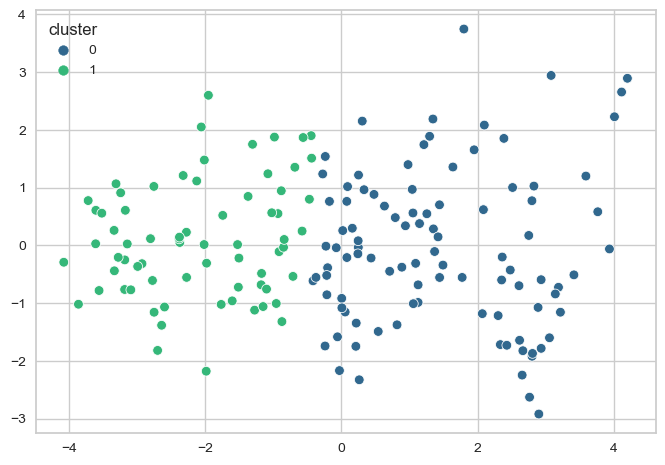

In [56]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
df_pca = pca_2d.fit_transform(df_scaled)

sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=df_clear['cluster'],palette='viridis')

---

# Bab 9: Model Saving

In [60]:
# Menyimpan scaling
with open('model_scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)
# Menyimpan PCA
with open('model_pca.pkl', 'wb') as file_2:
  pickle.dump(pca, file_2)
# Menyimpan model K-Means
with open('km.pkl', 'wb') as file_3:
  pickle.dump(km, file_3)

# Bab10: Kesimpulan

1. Negara-negara yang ada pada data sebagian besar negara sudah memiliki nilai life_expectancy yang cukup tinggi 
2. Life_expectancy yang tinggi memiliki korelasi positif dengan child mortality atau tingkat kematian anak yang rendah
3. Sebagian besar negara tingkat exports nya lebih rendah dari tingkat importsnya sehingga dapat mempengaruhi income dan juga gdpp sebuah negara
4. Berdasarkan Elbow method grafiknya sangat landai sehinga harus menggunakan metode lain untuk mendapatkan hasil yang akurat berkaitan dengan nilai K atau cluster
5. Berdasarkan Silhouette Score and Plot Silhouette Plot cluster optimal pada angka `2` karena dilihat dari distribusi titik data nya tercluster secara merata dan memiliki score paling tinggi sehingga pada model learning kali ini kita memilih cluster 2
6. Didapatkan data yang terbagi menjadi 2 cluster yaitu `no need humanitarian-aid` dan `needing humanitarian-aid` 
7. Untuk insight dalam setiap cluster 
    - Cluster `0` = sebanyak `98` negara
    Adalah cluster negara-negara dimana dikatakan negara yang `tidak membutuhkan bantuan` or `no need humanitarian-aid` dimana kita bisa lihat dari kolom `child-mortality` atau tingkat kematian anak yang rendah juga sangat erat kaitannya dengan tingkat `health` atau kesehatan yang tinggi pula tentunya dimana hal ini disupport dengan pendapatan negara yang tinggi bisa kita lihat dari kolom `income`dan `gdpp` yang tinggi serta `inflation` yang rendah dimana negara-negara ini mampu mengendalikan porsi `exports` dan `imports` sehingga pendapatan dan pengeluaran seimbang dan mensupport pendapatan negara, semua aspek yang telah disebutkan di atas memaknai harapan hidup yang tinggi dari suatu negara tersebut dimana kita bisa melihat kolom `life_expectancy` yang tinggi daripada cluster `1`

    - Cluster `1` = sebannyak `69` negara
    Adalah cluster negara negara dimana yang bisa katakan negara yang membutuhkan `bantuan` or `needing humanitarian-aid` dimana kita bisa lihat dari kolom `child_mortality` atau tingkat kematian anak yang sangat tinggi berkaitan erat dengan tingkat `health` yang rendah tentunya dikarenakan negara tidak mampu memfasilitasi masyarakatnya dengan fasilitas kesehatan yang memadai dengan `inflation` yang tinggi serta `income` dan `gdpp` yang rendah diakibatkan negara-negara ini tidak dapat memaksimalkan kegiatan `exports` mereka terlihat kolom `exports` lebih tinggi dari kolom `imports` sehingga negara banyak mengeluarkan dana untuk barang-barang `import` lebih ke aktivitas konsumerisme daripada productivity sehingga dengan aspek yang disebutkan di atas tentunya membuat `life_expectancy` di negara-negara dengan cluster ini sangat rendah di bandingkan dengan cluster `0`

8. Negara-negara yang paling membutuhkan bantuan ada sebanyak 69 negara diantaranya seperti Afganistan,Angola,Vanuatu,Yemen,Zambia,bahrain,benin,bolivia,turkmenistan,uganda,uzbekistan,timor leste, tongo,toga,tanzania, dan egypt dan masih banyak lagi
    